# Analysis of unstructured data

### Dominika Struzik

## ASSIGNMENT 1

In this assingment i have decided to analys criminal data, which were downloaded from __[Chicago data portal](https://data.cityofchicago.org/)__. Crime is an inseparable part of the world around us. Gathering and analysisng criminal data cannot only help to predict the next criminal action, but also can help to prevent it. Using advanced mathematical models, AI or machine learning techniques we are nowaddays able to create applications which are used by the police forces all over the world. They give oppourtinities to improve their work, allocate police resources in best possible ways but also to make sensible use of the police budget. However before we can analyse the data, at first we need to gather them, check them, clean them, so in one world, just prepare for the usage. Those are the actions, that I am gonna focus on, at the begining of this assingment.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date

For the pourpouse of this analyses i have choosen crimes which were commited between 01/01/2020 and 03/10/2021.

In [3]:
chicago_crime = pd.read_csv('Crimes_-_2001_to_Present.csv')

At first let us check what kind of informtion is gathered under this set of data.

In [5]:
pd.set_option('display.max_columns', None)
chicago_crime.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12016034,JD193556,01/01/2020 12:00:00 AM,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1434,14,32.0,22.0,11,1160263.0,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)"
1,12220321,JD430436,01/01/2020 12:00:00 AM,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,413,4,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2,12013828,JD191019,01/01/2020 12:00:00 AM,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,814,8,22.0,56.0,02,1143770.0,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)"
3,12019692,JD197444,01/01/2020 12:00:00 AM,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1922,19,47.0,6.0,11,1164983.0,1921507.0,2020,04/01/2020 03:50:17 PM,41.940222,-87.669039,"(41.940221932, -87.669039008)"
4,12036792,JD216459,01/01/2020 12:00:00 AM,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,8,18.0,66.0,11,1157290.0,1856526.0,2020,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)"
5,12252038,JD467398,01/01/2020 12:00:00 AM,072XX S UNIVERSITY AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,324,3,5.0,69.0,11,1185136.0,1857184.0,2020,12/26/2020 03:48:40 PM,41.763264,-87.596998,"(41.763263853, -87.596998313)"
6,12041817,JD222184,01/01/2020 12:00:00 AM,032XX N SHEFFIELD AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,1924,19,44.0,6.0,06,1169035.0,1921783.0,2020,05/06/2020 03:52:26 PM,41.940892,-87.654139,"(41.940892158, -87.654138616)"
7,12043522,JD224161,01/01/2020 12:00:00 AM,022XX W 111TH ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,2212,22,19.0,75.0,08A,1163209.0,1830971.0,2020,05/07/2020 03:45:36 PM,41.691818,-87.678096,"(41.691818181, -87.678096311)"
8,12045093,JD225922,01/01/2020 12:00:00 AM,020XX N LOCKWOOD AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,2515,25,36.0,19.0,08A,1140720.0,1913205.0,2020,05/09/2020 03:45:33 PM,41.917922,-87.758419,"(41.917921699, -87.758418952)"
9,12048400,JD229636,01/01/2020 12:00:00 AM,013XX W 13TH ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1233,12,25.0,28.0,17,1167593.0,1894183.0,2020,07/15/2020 03:49:52 PM,41.865187,-87.660234,"(41.865187198, -87.660234403)"


We can already see that there is many important and valuable information in this data set. We can find the exact date and location of the crime, in which district it was committed, what kind of crime it was, and even the information if the perpetrator was arrested.

Now we would like to know more about the data: how big the data set is, what are the standard statistics and if there are any empty values hidden.

In [9]:
chicago_crime.shape

(364528, 22)

In [10]:
chicago_crime.describe(include='all')

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,3.645280e+05,364528,364528,364528,364528,364528,364528,362789,364528,364528,364528.000000,364528.000000,364510.000000,364527.000000,364528,3.605100e+05,3.605100e+05,364528.000000,364528,360510.000000,360510.000000,360510
unique,NaN,364471,187714,29973,323,33,428,169,2,2,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,1282,NaN,NaN,160440
top,NaN,JE266473,05/31/2020 04:00:00 PM,001XX N STATE ST,0486,BATTERY,SIMPLE,STREET,False,False,NaN,NaN,NaN,NaN,06,NaN,NaN,NaN,12/17/2020 03:44:58 PM,NaN,NaN,"(41.883500187, -87.627876698)"
freq,NaN,5,90,733,35715,72218,41372,89368,311935,290340,NaN,NaN,NaN,NaN,70170,NaN,NaN,NaN,31166,NaN,NaN,356
mean,1.217332e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1145.671948,11.227755,23.001262,37.414584,NaN,1.164899e+06,1.885296e+06,2020.420280,NaN,41.840841,-87.670420,NaN
std,7.744045e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,695.488875,6.951000,13.787612,21.577900,NaN,1.648805e+04,3.195893e+04,0.493605,NaN,0.087896,0.060000,NaN
min,2.488900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,1.000000,1.000000,1.000000,NaN,1.091242e+06,1.813897e+06,2020.000000,NaN,41.644590,-87.939733,NaN
25%,1.207840e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611.000000,6.000000,10.000000,23.000000,NaN,1.152945e+06,1.857909e+06,2020.000000,NaN,41.765371,-87.713813,NaN
50%,1.221855e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023.000000,10.000000,23.000000,32.000000,NaN,1.166612e+06,1.890592e+06,2020.000000,NaN,41.855283,-87.664206,NaN
75%,1.236046e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1712.000000,17.000000,34.000000,56.000000,NaN,1.176758e+06,1.908621e+06,2021.000000,NaN,41.904948,-87.627133,NaN


In [11]:
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364528 entries, 0 to 364527
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    364528 non-null  int64  
 1   Case Number           364528 non-null  object 
 2   Date                  364528 non-null  object 
 3   Block                 364528 non-null  object 
 4   IUCR                  364528 non-null  object 
 5   Primary Type          364528 non-null  object 
 6   Description           364528 non-null  object 
 7   Location Description  362789 non-null  object 
 8   Arrest                364528 non-null  bool   
 9   Domestic              364528 non-null  bool   
 10  Beat                  364528 non-null  int64  
 11  District              364528 non-null  int64  
 12  Ward                  364510 non-null  float64
 13  Community Area        364527 non-null  float64
 14  FBI Code              364528 non-null  object 
 15  

As we can see there are some null values in columns: *Location Description, Ward, Community Area, X Coordinate, Y Coordinate, Latitude, Longitude, Location*. All of the empty valus are in columns which concerns the location of the crime.

At first i will transform the date format from the american one (MM/DD/YY) to more commone one (DD/MM/YY), we will remove also time because it won't be needed in the analysis.

In [59]:
chicago_crime['Date'] = pd.to_datetime(chicago_crime['Date']).dt.strftime('%d/%m/%y')

IUCR (Illinois Uniform Crime Reporting) codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports. These codes are also used to aggregate types of cases for statistical purposes.In todays analyses we will use column with descriptive information of the crime, so we dont need two columns with the same information, that is why we can remove column *IUCR* from our data set. Additionaly we do not need so many columns which have location data, so we can delete column *Location* which has object data (they are harder to analyse than float/int data which the rest of location's columns have).

In [28]:
chicago_crime = chicago_crime.drop(columns=['IUCR', 'Location'])

Finally we can consider how to handle the null values. At the begining we will check how many empty values there are in the data.

In [29]:
chicago_crime.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
Primary Type               0
Description                0
Location Description    1739
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      18
Community Area             1
FBI Code                   0
X Coordinate            4018
Y Coordinate            4018
Year                       0
Updated On                 0
Latitude                4018
Longitude               4018
dtype: int64

As it was alrady mentioned, only columns with location information, have missing data. Let's check the percentage of null values in each column.

In [30]:
chicago_crime.isnull().sum()/len(chicago_crime)

ID                      0.000000
Case Number             0.000000
Date                    0.000000
Block                   0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.004771
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000000
Ward                    0.000049
Community Area          0.000003
FBI Code                0.000000
X Coordinate            0.011022
Y Coordinate            0.011022
Year                    0.000000
Updated On              0.000000
Latitude                0.011022
Longitude               0.011022
dtype: float64

In case of *Location Description, Ward, Community Area* the percentage of missing values is lower than 1, for the rest columns where there are any nulls, the percentage is the same, equal to 1,1%. In case of empty rows in column *Location Description* we can use value *"NOT GIVEN"* to replace the nulls. When it comes to empty values in *Ward* and *Community Area* we can just remove those records, becasue the amount of the nulls is really small.

In [31]:
chicago_crime['Location Description'].fillna('NOT GIVEN', inplace=True)

In [36]:
chicago_crime = chicago_crime[chicago_crime['Ward'].notna()]
chicago_crime = chicago_crime[chicago_crime['Community Area'].notna()]

Let's see how the data are distributed in case of other columns with missing data, to decide how to handle them. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122D4D78>]],
      dtype=object)

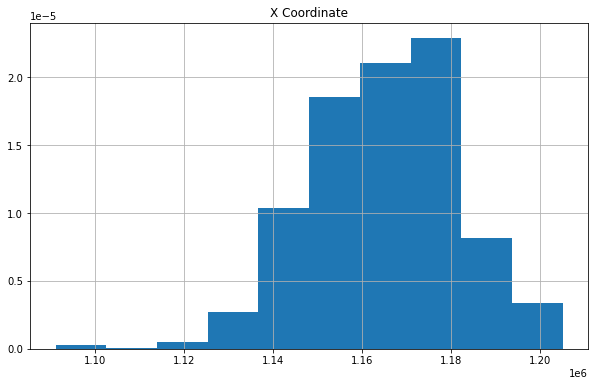

In [37]:
chicago_crime.hist('X Coordinate', density=1, figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12310178>]],
      dtype=object)

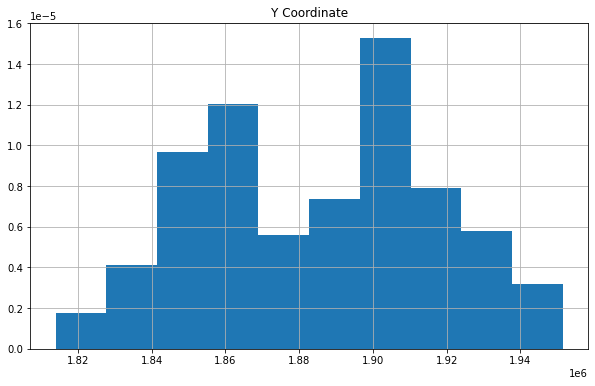

In [38]:
chicago_crime.hist('Y Coordinate', density=1, figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12CB30E8>]],
      dtype=object)

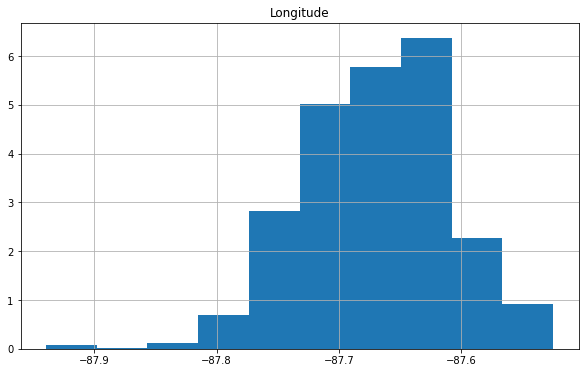

In [40]:
chicago_crime.hist('Longitude', density=1, figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12C67A18>]],
      dtype=object)

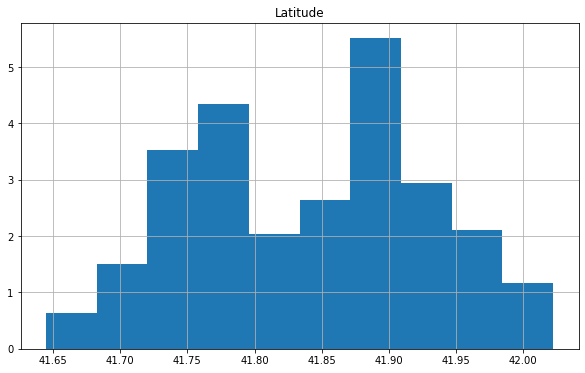

In [39]:
chicago_crime.hist('Latitude', density=1, figsize=(10,6))

Aswe can see ofcourse the distrbiution of *X Coordinates* is the same as *Longitude*, because both columns states the same features written in different values. It's the same for *Y Coordinates* and *Latitude*. Based on the histogrames, whichare not very scewed, we can replace the missing values with the mean value in each column.

In [41]:
chicago_crime['X Coordinate'].fillna(chicago_crime['X Coordinate'].mean(), inplace=True)
chicago_crime['Y Coordinate'].fillna(chicago_crime['Y Coordinate'].mean(), inplace=True)
chicago_crime['Longitude'].fillna(chicago_crime['Longitude'].mean(), inplace=True)
chicago_crime['Latitude'].fillna(chicago_crime['Latitude'].mean(), inplace=True)

Let's look again if we get rid of all the null values in our data set, and what is the final size of the data set.

In [43]:
chicago_crime.isnull().sum()/len(chicago_crime)

ID                      0.0
Case Number             0.0
Date                    0.0
Block                   0.0
Primary Type            0.0
Description             0.0
Location Description    0.0
Arrest                  0.0
Domestic                0.0
Beat                    0.0
District                0.0
Ward                    0.0
Community Area          0.0
FBI Code                0.0
X Coordinate            0.0
Y Coordinate            0.0
Year                    0.0
Updated On              0.0
Latitude                0.0
Longitude               0.0
dtype: float64

In [44]:
chicago_crime.shape

(364510, 20)

As the final part of the preparation data to further analyses, we will change the headers of the columns where are any empty spaces between the words.

In [48]:
chicago_crime.rename(columns={'Case Number' : 'CaseNumber',
                    'Primary Type' : 'PrimaryType',
                    'Number.of.Bags' : 'Number_of_bags',
                    'Location Description' : 'LocationDescription',
                    'Community Area' : 'CommunityArea',
                    'FBI Code' : 'FBIcode',
                    'X Coordinate' : 'Xcoordinate',
                    'Y Coordinate' : 'Ycoordinate',
                    'Updated On' : 'UpdatedOn'},
           inplace=True)

We can finally take a next step and proceed with the analsis of the data.

At first i would like to check which crimes are committed the most often.

In [57]:
chicago_crime.PrimaryType.value_counts()

BATTERY                              72212
THEFT                                70169
CRIMINAL DAMAGE                      43794
ASSAULT                              33638
DECEPTIVE PRACTICE                   30456
OTHER OFFENSE                        23125
MOTOR VEHICLE THEFT                  17316
WEAPONS VIOLATION                    15434
ROBBERY                              13361
BURGLARY                             13254
NARCOTICS                            10764
CRIMINAL TRESPASS                     6691
OFFENSE INVOLVING CHILDREN            3315
CRIMINAL SEXUAL ASSAULT               2211
PUBLIC PEACE VIOLATION                1733
SEX OFFENSE                           1709
HOMICIDE                              1421
ARSON                                  983
INTERFERENCE WITH PUBLIC OFFICER       893
STALKING                               456
PROSTITUTION                           349
CONCEALED CARRY LICENSE VIOLATION      285
LIQUOR LAW VIOLATION                   263
INTIMIDATIO

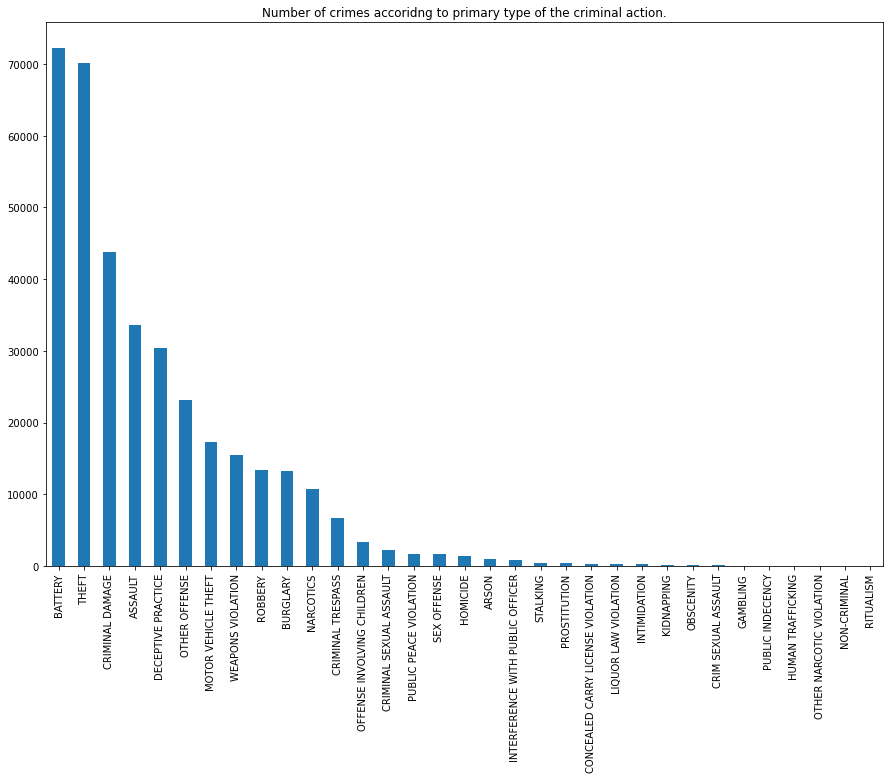

In [262]:
chicago_crime.PrimaryType.value_counts().plot(kind = 'bar', figsize=(15,10))
plt.title('Number of crimes accoridng to primary type of the criminal action.')
plt.show()

Battery, which is a criminal offense involving unlawful physical contact, and theft occures the most often in Chicago. Those are crimes with rather low harmfulness of the act.

In [101]:
days = date(2021, 10, 3) - date(2020, 1, 1)
days 

datetime.timedelta(days=641)

In [103]:
hom_per_day = 1421/641
hom_per_day

2.216848673946958

As the homicide is one othe most series crime, on average it occures arouncd twice a day.\
Let us see, how those two most popular crime are committed on the spectrum of the year.

In [139]:
battery = chicago_crime.loc[chicago_crime['PrimaryType'].isin(['BATTERY'])]
theft = chicago_crime.loc[chicago_crime['PrimaryType'].isin(['THEFT'])]

In [149]:
battery.Date.value_counts()

01/01/20    236
20/06/21    189
05/07/21    187
04/07/21    186
04/07/20    186
           ... 
06/01/21     64
09/02/21     63
23/04/20     59
03/12/20     58
14/04/20     53
Name: Date, Length: 642, dtype: int64

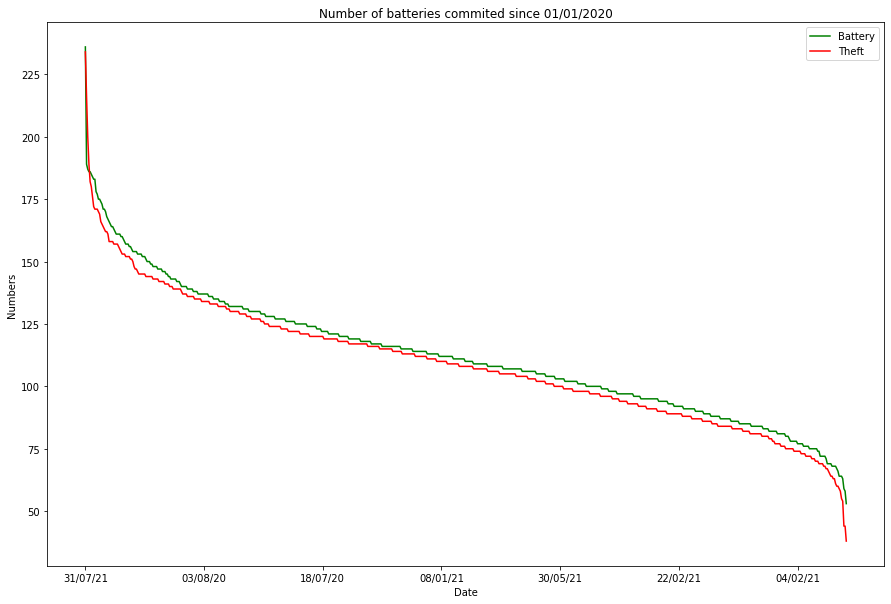

In [261]:
battery.Date.value_counts().plot(kind = 'line', figsize=(15,10), color='green')
theft.Date.value_counts().plot(kind = 'line', figsize=(15,10), color='red')
plt.title('Number of batteries commited since 01/01/2020')
#plt.xticks(np.arange(0, 642, 27))
plt.xlabel('Date')
plt.ylabel('Numbers')
plt.legend(['Battery','Theft'])
plt.show()

We can see that in case of both types of crimes the number of them is decreasing which could mean that Chicago is becoming safer place, and that police work is giving good results in reality. But from the otheer hand, what if the reports of the crimes just decreased, not the real amount of criminal actions? That is always the biggest quetion while analysing the criminal data - what is the dark/hidden amount of crimes

In the data we can also find the information of the arrested perpatrators - let us check how many of the criminal were arrested fro commiting the battery and theft and how many are found for committing more series crime, like homicide, but at first let us see what's the overall number of arrested crminals.

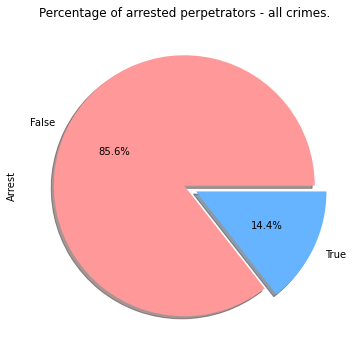

In [248]:
explode = (0, 0.1)
colors = ['#ff9999','#66b3ff']
chicago_crime.Arrest.value_counts().plot(kind = 'pie', figsize=(10,6), explode=explode, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Percentage of arrested perpetrators - all crimes.')
plt.show()

In [176]:
arrets = chicago_crime.groupby(['Date','Arrest']).count()

In [184]:
arrets[arrets.columns[1]]

Date      Arrest
01/01/20  False     734
          True      189
01/01/21  False     572
          True      114
01/02/20  False     635
                   ... 
31/08/21  True       58
31/10/20  False     524
          True      101
31/12/20  False     472
          True       78
Name: ID, Length: 1284, dtype: int64

In [188]:
arrets_bt = chicago_crime.loc[chicago_crime['PrimaryType'].isin(['BATTERY', 'THEFT'])]

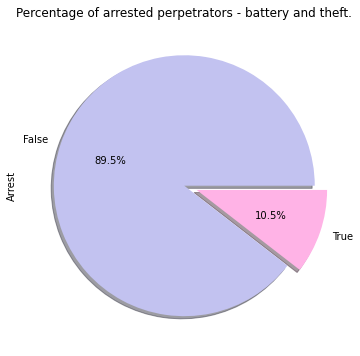

In [249]:
explode = (0, 0.1)
colors = ['#c2c2f0','#ffb3e6']
arrets_bt.Arrest.value_counts().plot(kind = 'pie', figsize=(10,6), explode=explode, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Percentage of arrested perpetrators - battery and theft.')
plt.show()

In [191]:
arrets_hom = chicago_crime.loc[chicago_crime['PrimaryType'].isin(['HOMICIDE'])]

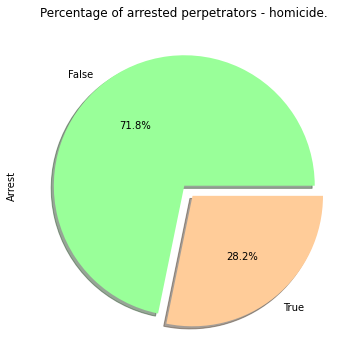

In [250]:
explode = (0, 0.1)
colors = ['#99ff99','#ffcc99']
arrets_hom.Arrest.value_counts().plot(kind = 'pie', figsize=(10,6), explode=explode, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Percentage of arrested perpetrators - homicide.')
plt.show()

We can observe that in overall there is a really small rate of arresting criminals for their unlawful actions. For the most common crimes (battery, theft) the rate is even smaller than the average, compering to all observations. It is actually not thats suprasing when we will think of the nature of those crimes. Most of them are conducted on the streets, in big crowds, victims sometimes don't even know that they become one. The actions of criminal are quick, and for victims its really hard to point their perpatrator. The arresting rate is much higher though in case of homicides. Those cases are always investigated with high priority, with all the resources that are avaible, because the social harm of this act is much higher. According to this there are still more than 70% of perpetrators who never meet the justice. 

Now we will check how the data is distributed according to the location of the crime.

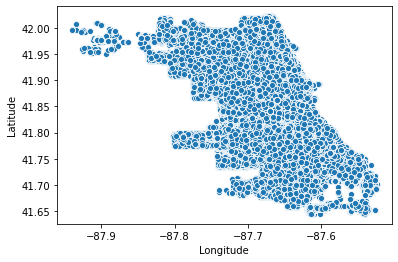

In [227]:
sns.scatterplot(data=chicago_crime, x='Longitude',y='Latitude')

We can easilly notice that ploted location created the map of Chicago. Because the amount of data is really big, we cannot observe any interesting patterns, which could told us which areas of the Chicago are the most dangerous. We can sample our data or e.g. check one of the crimes. Later on we will also analyse the most dangerous districts, which will help us to state the areas where is commited biggest number of crimes.

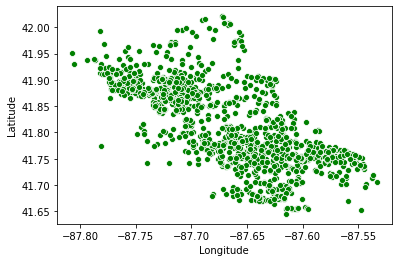

In [230]:
sns.scatterplot(data=chicago_crime.loc[chicago_crime['PrimaryType'].isin(['HOMICIDE'])], x='Longitude',y='Latitude', color='green')

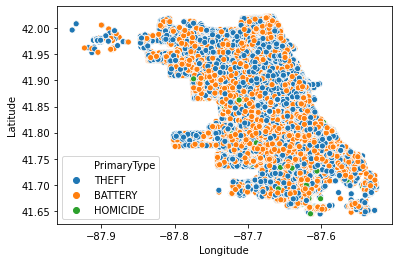

In [233]:
sns.scatterplot(data=chicago_crime.loc[chicago_crime['PrimaryType'].isin(['BATTERY','THEFT', 'HOMICIDE'])], x='Longitude',y='Latitude', hue='PrimaryType')

We can observe that when we check different types of crimes, not all of them occures in each parts of the city. Thefts are conducted all over the Chicago, but in case of battery and especially homicides, we can distinquishe clusters of the data. This easy way of presenting the data, already suggest, that there are areas in which we can become victim of the battery or homicide with a bigger probability than in other places. 

In [234]:
chicago_crime.District.value_counts()

11    25194
6     24248
8     22640
4     21591
7     19833
25    19219
3     18927
12    17799
5     17496
10    16880
2     16384
19    16324
18    15947
9     15940
15    14878
1     14861
16    13425
22    12267
24    11762
14    11613
17    10121
20     7147
31       14
Name: District, dtype: int64

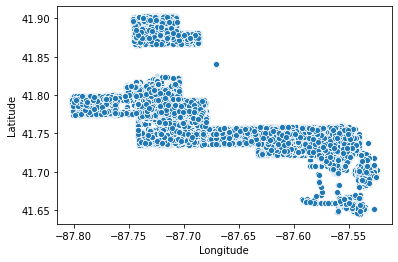

In [277]:
sns.scatterplot(data=chicago_crime.loc[chicago_crime['District'].isin(['11','6', '8','4'])], x='Longitude',y='Latitude')

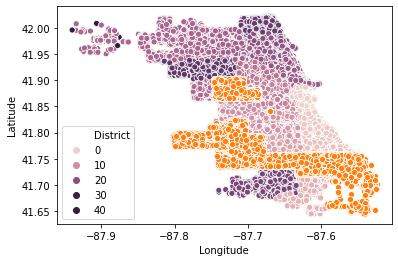

In [241]:
sns.scatterplot(data=chicago_crime, x='Longitude',y='Latitude', hue='District')
sns.scatterplot(data=chicago_crime.loc[chicago_crime['District'].isin(['11','6', '8', '4'])], x='Longitude',y='Latitude')
plt.show()

The orange spots shows what are the most dangerous districts according to number of commited crimes. When we compare locations of homicides or battery, we can notice that in those areas are also clusters of those crimes.

When it comes to homicides, we can alsodistinquishe the ones which were committed purposely and by accident. The *FBI code* will help us to recognise the split between both of those types.

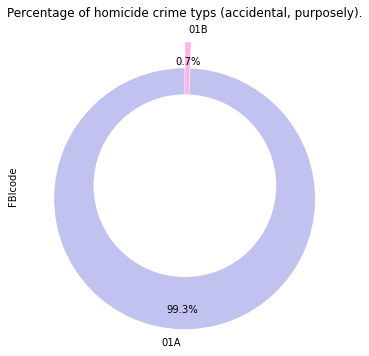

In [252]:
explode = (0.1, 0.1)
colors = ['#c2c2f0','#ffb3e6']
arrets_hom.FBIcode.value_counts().plot(kind = 'pie', figsize=(10,6), startangle=90, pctdistance=0.85, explode=explode, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of homicide crime types (accidental, purposely).')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Code 01A states the homicides conducted purposely, so only 0.7 % of homicide cases are comiitted by accident.

## Summary

Even though the data contained missing values, the obtained results are satisfying.
We can clearly see that the numbers, of the most often committed crimes, are decreasing. We could distinguish the districts in Chicago which are the most dangerous: 11, 6, 8, 4. The amount of perpetrators' arrests is pretty alarming, even in the case of the most serious crime, like homicide (28.2 %). Those data hid much valuable information which can be dug out during the further analysis.